In [1]:
# Class April 9
# Load DWave's graph package
import networkx as nx

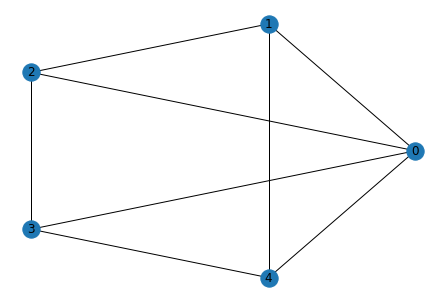

In [10]:
w5 = nx.wheel_graph(5)
nx.draw_circular(w5, with_labels=True)

In [11]:
# Let's solve the minimum exact cover using the CPU, using the brute force method exact solver (evaluates all possibilities)
from dimod.reference.samplers import ExactSolver
sampler = ExactSolver()

In [12]:
# Use Ocean’s dwave_networkx to produce a BQM for our graph and solve the min vertex cover in on the selected sampler. In other examples the BQM is explicitly created but the Ocean tool used here abstracts the BQM: given the problem graph it returns a solution to a BQM it creates internally.
import dwave_networkx as dnx
print(dnx.min_vertex_cover(w5, sampler))

[0, 1, 3]


In [22]:
# Solve on the QPU
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
solution = dnx.min_vertex_cover(w5, sampler)
print(solution)

[0, 1, 3]


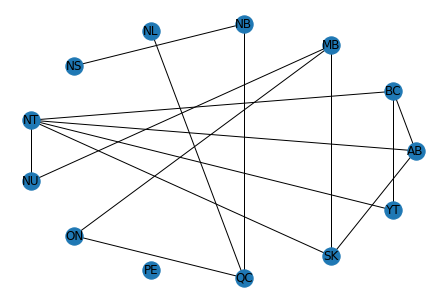

In [20]:
# Let's define a more complicated graph, provinces of Canada
provinces = ['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']
neighbors = [('AB', 'BC'), ('AB', 'NT'), ('AB', 'SK'), ('BC', 'NT'), ('BC', 'YT'), ('MB', 'NU'),
             ('MB', 'ON'), ('MB', 'SK'), ('NB', 'NS'), ('NB', 'QC'), ('NL', 'QC'), ('NT', 'NU'),
             ('NT', 'SK'), ('NT', 'YT'), ('ON', 'QC')]
#
Canada = nx.Graph()
Canada.add_nodes_from(provinces)
Canada.add_edges_from(neighbors)
nx.draw_circular(Canada, with_labels=True)

In [21]:
# Use QPU to find min vertex cover for Canada
sampler = EmbeddingComposite(DWaveSampler())
solution = dnx.min_vertex_cover(Canada, sampler)
print(solution)

['AB', 'BC', 'MB', 'NB', 'NT', 'QC']
